#### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\demo_data\5.outlier.csv", header=None)
df

,0,1,2
0,-17.897000,7.662423,0
1,-26.343161,-3.055257,0
2,-19.059771,-8.531838,0
3,-16.383898,-2.352667,0
4,-12.926541,9.074994,0
...,...,...,...
595,4.782462,-29.002590,0
596,3.990671,-27.664533,0
597,1.968937,-27.666538,0
598,0.397395,-28.864856,0


In [3]:
df.shape

(600, 3)

In [4]:
df[[0,1]]

(600, 3)

/Users/shivakmuddam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


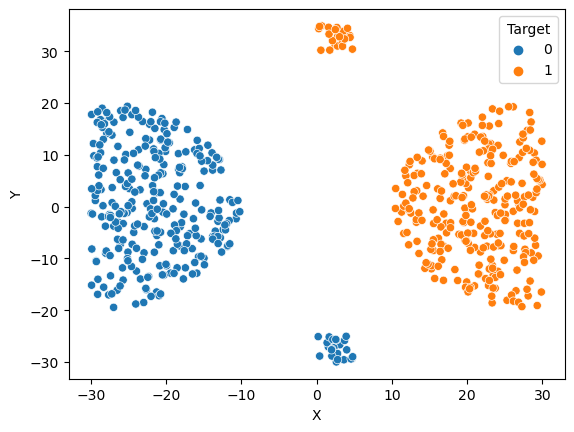

In [5]:
sns.scatterplot(x=df[0],y=df[1],hue=df[2],data=df)

#### splitting the data into train and test and strandardising of it

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[[0,1]],df[2],test_size=0.2)

In [5]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [6]:
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

#### Building MLP

In [7]:
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [9]:

model = Sequential()
model.add(Dense(2, activation="relu", input_dim = 2))
model.add(Dense(1, activation="sigmoid"))

In [10]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

#### Training the data

In [12]:
save = model.fit(x_train, y_train, epochs = 150, validation_split= 0.2,batch_size=10)

Epoch 1/150
39/39 [==============================] - 1s 6ms/step - loss: 0.8943 - accuracy: 0.2500 - val_loss: 0.9495 - val_accuracy: 0.1771
Epoch 2/150
39/39 [==============================] - 0s 2ms/step - loss: 0.8569 - accuracy: 0.2500 - val_loss: 0.9101 - val_accuracy: 0.2604
Epoch 3/150
39/39 [==============================] - 0s 2ms/step - loss: 0.8245 - accuracy: 0.3438 - val_loss: 0.8775 - val_accuracy: 0.3333
Epoch 4/150
39/39 [==============================] - 0s 3ms/step - loss: 0.7975 - accuracy: 0.3984 - val_loss: 0.8466 - val_accuracy: 0.3333
Epoch 5/150
39/39 [==============================] - 0s 3ms/step - loss: 0.7736 - accuracy: 0.4089 - val_loss: 0.8217 - val_accuracy: 0.3646
Epoch 6/150
39/39 [==============================] - 0s 3ms/step - loss: 0.7542 - accuracy: 0.4219 - val_loss: 0.7974 - val_accuracy: 0.3542
Epoch 7/150
39/39 [==============================] - 0s 2ms/step - loss: 0.7353 - accuracy: 0.4609 - val_loss: 0.7781 - val_accuracy: 0.3750
Epoch 8/150
3

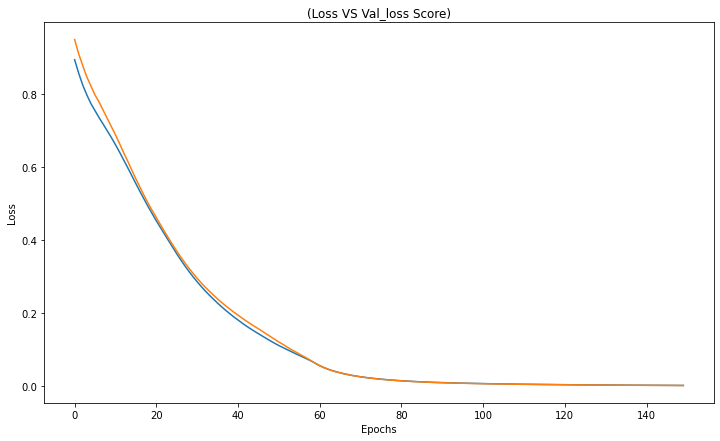

In [13]:
plt.figure(figsize=(12, 7))
plt.plot(save.history['loss'])
plt.plot(save.history['val_loss'])
plt.title("(Loss VS Val_loss Score)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [16]:
y_pred=model.predict(x_test)

4/4 [==============================] - 0s 1ms/step


In [17]:
y_capf=np.where(y_pred>0.5,1,0)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

1.0

#### plotting the decesion surface

3888/3888 [==============================] - 4s 1ms/step


<AxesSubplot:>

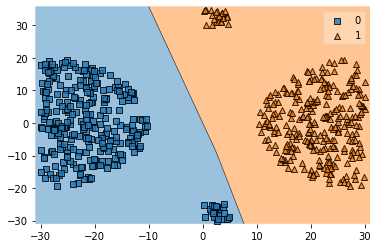

In [19]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)